In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

import matplotlib
from distutils.version import LooseVersion

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 

# Load Data

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


# Train with all featuees


In [6]:
def train(svm, title):
    svm.fit(X_train_std, y_train)
    
    # report accuary
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test,y_pred)*100
    confusion_mat = confusion_matrix(y_test,y_pred)
    print(f"Accuracy for {title} is:",accuracy)
    print("Confusion Matrix")
    print(confusion_mat)

In [7]:
svm1 = SVC(kernel='linear', C=1.0, random_state=1)
svm2 = SVC(kernel='poly', C=1.0, random_state=1)
svm3 = SVC(kernel='sigmoid', C=1.0, random_state=1)
svm4 = SVC(kernel='rbf', C=1.0, random_state=1)


In [8]:
train(svm1,  title="SVM with Linear Kernel")

Accuracy for SVM with Linear Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [9]:
train(svm2,  title="SVM with Poly Kernel")

Accuracy for SVM with Poly Kernel is: 88.88888888888889
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [10]:
train(svm1,  title="SVM with Sigmoid Kernel")

Accuracy for SVM with Sigmoid Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [11]:
train(svm1,  title="SVM with RBF Kernel")

Accuracy for SVM with RBF Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


## Plot decison boundary with 2 features

In [12]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

In [27]:
def report_all(svm, title):
    svm.fit(X_train_std, y_train)
    
    # report accuary
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test,y_pred)*100
    confusion_mat = confusion_matrix(y_test,y_pred)
    print(f"Accuracy for {title} is:",accuracy)
    print("Confusion Matrix")
    print(confusion_mat)
    
    # plot decision boundary
    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=svm, 
                          test_idx=range(105, 150))
    
    plt.title(title)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [29]:
svm_err = SVC(kernel='linear', C=1.0, random_state=1)
train(svm_err,  title="SVM with Linear Kernel")
report_all(svm_err,  title="SVM with Linear Kernel")

#unable to plot 2-D decision boundary due to model trained by 4 features.

Accuracy for SVM with Linear Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Accuracy for SVM with Linear Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


ValueError: X has 2 features, but SVC is expecting 4 features as input.

In [13]:


def report(svm, title):
    svm.fit(X_train_std[:, [2, 3]], y_train)
    
    # report accuary
    y_pred = svm.predict(X_test_std[:, [2, 3]])
    accuracy = accuracy_score(y_test,y_pred)*100
    confusion_mat = confusion_matrix(y_test,y_pred)
    print(f"Accuracy for {title} is:",accuracy)
    print("Confusion Matrix")
    print(confusion_mat)
    
    # plot decision boundary
    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=svm, 
                          test_idx=range(105, 150))
    
    plt.title(title)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Accuracy for SVM with linear Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


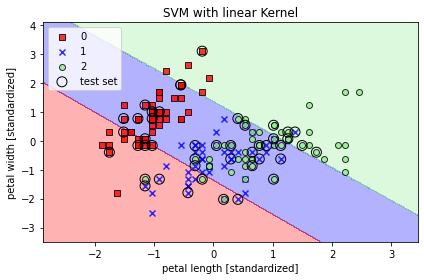

In [14]:
svm1 = SVC(kernel='linear', C=1.0, random_state=1)
report(svm1, title="SVM with linear Kernel")

Accuracy for SVM with poly Kernel is: 95.55555555555556
Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


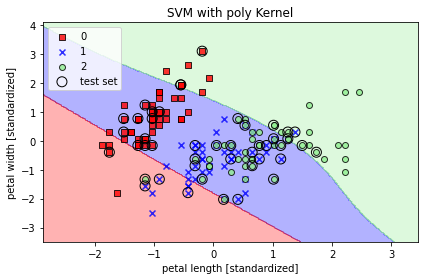

In [15]:
report(svm2,  title="SVM with poly Kernel")

Accuracy for SVM with sigmoid Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


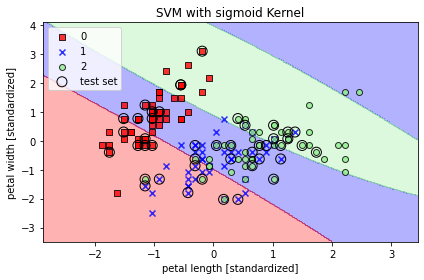

In [16]:
report(svm3, title="SVM with sigmoid Kernel")

Accuracy for SVM with rbf Kernel is: 97.77777777777777
Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


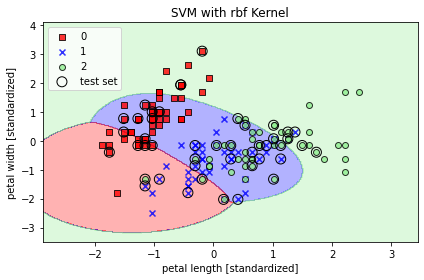

In [17]:
report(svm4, title="SVM with rbf Kernel")

Polynomial kernel model gave lower accuracy compared to the other three models. 